<a href="https://colab.research.google.com/github/NUELBUNDI/PDS_PROJECT/blob/main/PDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import missingno as mn

In [53]:
# Read csv File.

df= pd.read_csv("https://raw.githubusercontent.com/NUELBUNDI/PDS_PROJECT/main/sales_data_sample.csv",encoding="Latin-1")

# **SECTION 1 : CLEANING DATA**

In [54]:
# read first five rows

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [55]:
# Convert the Columns to lower case. Ease with uniform case.
df.columns=df.columns.str.lower()

In [57]:
print(f' The Shape of the Dataframe is in Rows and Columns respectively as  {df.shape}')

 The Shape of the Dataframe is in Rows and Columns respectively as  (2823, 25)


In [61]:
# Check for the Missing Values as value of Mean Percentage per rows so as to evaluate their relevance 

d_types=df.dtypes
d_missing=df.isnull().mean().round(4)*100

# converting to data frames

details1=pd.DataFrame(d_types,columns=['DTYPE'])
details2=pd.DataFrame(d_missing,columns=['MISSING'])

# Combine the dataframes
combine_df=pd.concat([details1,details2],axis=1)
combine_df.sort_values(by='MISSING',ascending=False)


,DTYPE,MISSING
addressline2,object,89.30
state,object,52.64
territory,object,38.04
postalcode,object,2.69
ordernumber,int64,0.00
customername,object,0.00
contactfirstname,object,0.00
contactlastname,object,0.00
country,object,0.00
city,object,0.00


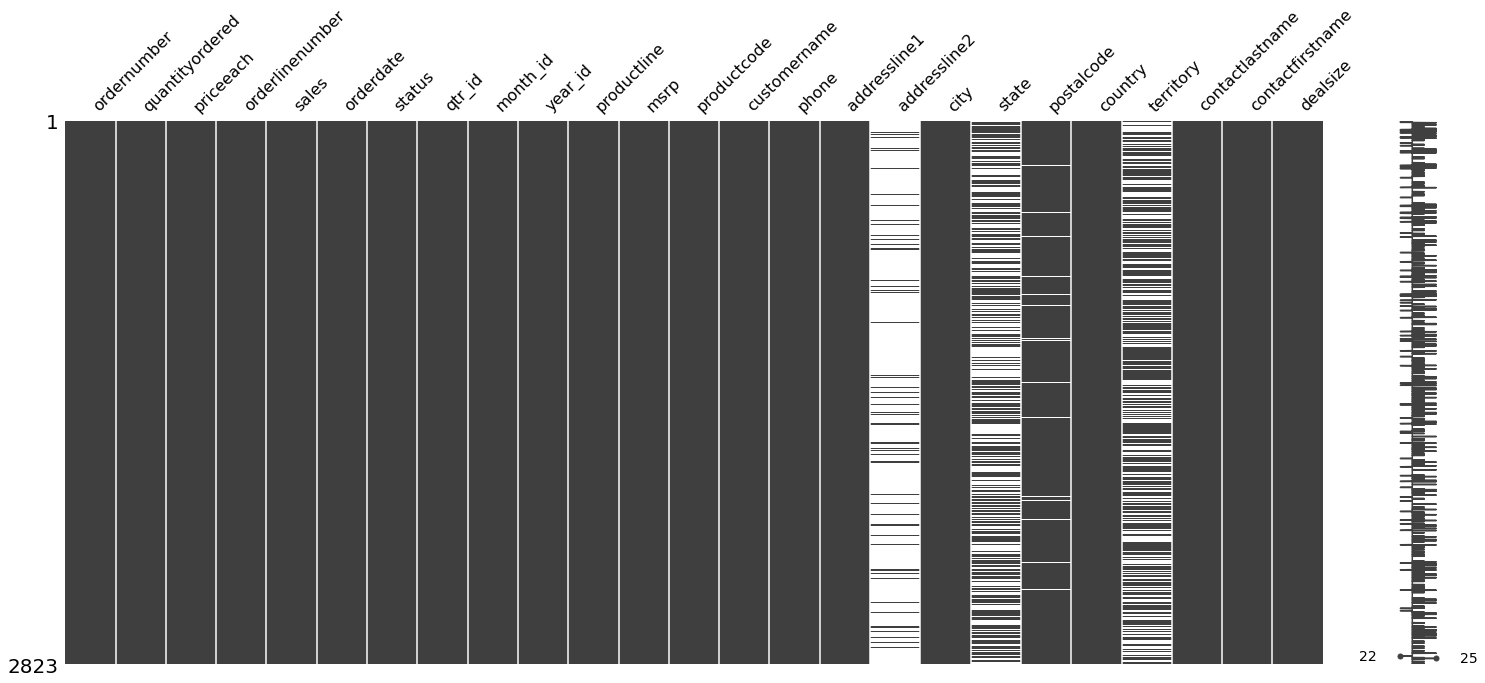

In [62]:
#Visualize the missing values

mn.matrix(df)

In [63]:
# Decision to drop the columns with 80% missing values

# create a copy of the original dataframe
df_copy=df.copy()

cols=['addressline2','territory']

df.drop(columns= [i for i in cols],inplace=True)

In [67]:
df.tail(3)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,NaN,31000,France,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,MA,51003,USA,Yoshido,Juri,Medium


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  city              2823 non-null   object 
